In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

from sklearn.metrics import confusion_matrix

In [29]:
data_path = '/Users/haokai/Desktop/Github repository/Processed data/'

In [41]:
# Set the font properties
plt.rcParams.update({
    'font.family': 'Arial',     # Set the font family
    'font.size': 12,            # Set the base font size
    'axes.titlesize': 16,       # Set the font size of the axes title
    'axes.labelsize': 16,       # Set the font size of the x and y labels
    'xtick.labelsize': 12,      # Set the font size of the x tick labels
    'ytick.labelsize': 12,      # Set the font size of the y tick labels
    'legend.fontsize': 12,      # Set the font size of the legend
    'figure.titlesize': 16      # Set the font size of the figure title
})

# Fig. 1F

In [31]:
syn1_df = pd.read_csv(data_path + 'synthetic_BC1_CNN.csv')
syn1_df

,bc_label,model_output,row_num,dist,abs_dist
0,12,0,row12344,12,12
1,12,0,row11057,12,12
2,12,0,row11373,12,12
3,12,0,row12305,12,12
4,12,0,row12314,12,12
...,...,...,...,...,...
22592,8,8,row07346,0,0
22593,8,8,row14293,0,0
22594,8,8,row07150,0,0
22595,11,11,row09634,0,0


In [33]:
bc1_counts = syn1_df.groupby('bc_label', as_index=False).size()
bc1_counts

,bc_label,size
0,0,458
1,1,432
2,2,796
3,3,640
4,4,1395
5,5,1679
6,6,4648
7,7,3992
8,8,3186
9,9,1728


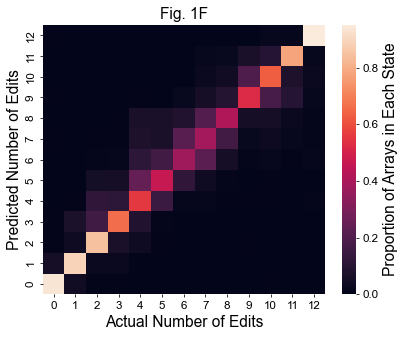

In [34]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming syn8_df is already defined and loaded

# Filter the DataFrame to include only rows where 'model_output' is not null
temp_df = syn1_df[syn1_df['model_output'].notnull()]

# Calculate the confusion matrix, normalizing it row-wise
cf_matrix = confusion_matrix(temp_df['bc_label'], temp_df['model_output'], normalize='true')

# Plotting the heatmap
plt.figure(figsize=(6.5, 5), dpi=70)
ax = sns.heatmap(
    cf_matrix,
    annot=False,
    fmt='0.2g',
    #cmap='inferno',
    cbar_kws={'label': 'Proportion of Arrays in Each State'}
    
)
#ax.figure.axes[-1].yaxis.label.set_size(14)
plt.xlabel('Actual Number of Edits')
plt.ylabel('Predicted Number of Edits')
plt.tick_params(axis='both', which='major')
plt.title('Fig. 1F')

# Invert the y-axis
ax.invert_yaxis()
#save_path = os.path.join(data_dir, f'syn_BC8_discrete_CNN.svg')
#plt.savefig(save_path, dpi=300, format='svg', transparent=True)
plt.show()

In [35]:
from sklearn.metrics import confusion_matrix, f1_score

# Assuming temp_df is already defined and loaded

# Filter the DataFrame to include only rows where 'model_output' is not null
temp_df = syn1_df[syn1_df['model_output'].notnull()]

# Calculate the confusion matrix
cf_matrix = confusion_matrix(temp_df['bc_label'], temp_df['model_output'])

# Calculate F1-score
f1_macro = f1_score(temp_df['bc_label'], temp_df['model_output'], average='macro')
#f1_weighted = f1_score(temp_df['bc_label'], temp_df['model_output'], average='weighted')
f1_per_class = f1_score(temp_df['bc_label'], temp_df['model_output'], average=None)
print(f"F1-scores per class: {f1_per_class}")

print(f"Macro F1-score: {f1_macro:.2f}")
#print(f"Weighted F1-score: {f1_weighted:.2f}")


F1-scores per class: [0.872579   0.8113804  0.70502092 0.56454849 0.41691355 0.40030597
 0.4470377  0.41219938 0.46685472 0.56537983 0.48342059 0.74428274
 0.90373416]
Macro F1-score: 0.60


# Fig. S1D

In [26]:
syn2_df = pd.read_csv(data_path + 'synthetic_BC2_CNN.csv')
syn2_df

,label,area,centroid-0,centroid-1,bbox-0,bbox-1,bbox-2,bbox-3,mean_intensity_647,mean_intensity_546,...,edit ratio,intensity_647,intensity_546,int_ratio,int_frac,row_num,bc_label,model_output,dist,abs_dist
0,199,5,1574.200000,598.600000,1573,598,1576,600,948.200000,3041.000000,...,0.916667,8.464003,9.629380,1.137686,0.532204,row13677,11.0,0.0,11.0,11.0
1,227,1,1525.000000,1154.000000,1525,1154,1526,1155,724.000000,2491.000000,...,0.916667,6.584791,7.820440,1.187652,0.542889,row14186,11.0,0.0,11.0,11.0
2,3,6,21.833333,679.166667,21,678,24,681,1053.166667,3322.666667,...,0.833333,8.751316,9.900282,1.131291,0.530801,row12016,10.0,0.0,10.0,10.0
3,175,1,1352.000000,180.000000,1352,180,1353,181,1045.000000,2650.000000,...,0.916667,6.951772,7.882315,1.133857,0.531365,row13653,11.0,1.0,10.0,10.0
4,328,2,1975.000000,16.500000,1975,16,1976,18,765.500000,2432.500000,...,0.833333,7.333676,8.489822,1.157649,0.536533,row12006,10.0,1.0,9.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15850,137,170,1425.176471,1717.841176,1414,1713,1436,1724,609.052941,10904.735294,...,1.000000,11.547704,14.432751,1.249837,0.555523,row15799,NaN,NaN,NaN,NaN
15851,138,105,1422.276190,596.323810,1416,590,1431,603,595.295238,7240.057143,...,1.000000,11.043018,13.541345,1.226236,0.550811,row15800,NaN,NaN,NaN,NaN
15852,166,134,1867.388060,975.850746,1862,968,1874,984,591.970149,8261.111940,...,1.000000,11.281296,13.917154,1.233649,0.552302,row15828,NaN,NaN,NaN,NaN
15853,167,91,1878.681319,815.824176,1870,812,1887,820,615.813187,5909.461538,...,1.000000,10.933803,13.195170,1.206823,0.546860,row15829,NaN,NaN,NaN,NaN


In [36]:
syn2_df.columns

Index(['label', 'area', 'centroid-0', 'centroid-1', 'bbox-0', 'bbox-1',
       'bbox-2', 'bbox-3', 'mean_intensity_647', 'mean_intensity_546',
       'cell_line', 'position', 'barcode', 'editd positions', 'edit ratio',
       'intensity_647', 'intensity_546', 'int_ratio', 'int_frac', 'row_num',
       'bc_label', 'model_output', 'dist', 'abs_dist'],
      dtype='object')

In [37]:
bc2_counts = syn2_df.groupby('bc_label', as_index=False).size()
bc2_counts

,bc_label,size
0,0.0,947
1,1.0,909
2,2.0,1409
3,3.0,1400
4,4.0,805
5,5.0,897
6,6.0,1014
7,7.0,1206
8,8.0,978
9,9.0,1145


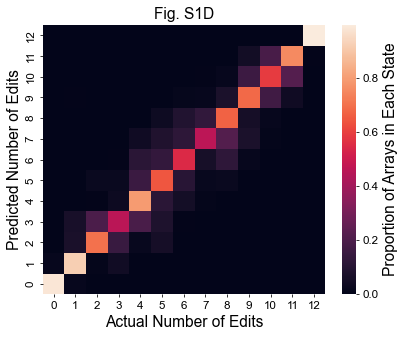

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming syn8_df is already defined and loaded

# Filter the DataFrame to include only rows where 'model_output' is not null
temp_df = syn2_df[syn2_df['model_output'].notnull()]

# Calculate the confusion matrix, normalizing it row-wise
cf_matrix = confusion_matrix(temp_df['bc_label'], temp_df['model_output'], normalize='true')

# Plotting the heatmap
plt.figure(figsize=(6.5, 5), dpi=70)
ax = sns.heatmap(
    cf_matrix,
    annot=False,
    fmt='0.2g',
    #cmap='inferno',
    cbar_kws={'label': 'Proportion of Arrays in Each State'},
    
)
#ax.figure.axes[-1].yaxis.label.set_size(14)
plt.xlabel('Actual Number of Edits')
plt.ylabel('Predicted Number of Edits')
plt.tick_params(axis='both', which='major')
plt.title('Fig. S1D')

# Invert the y-axis
ax.invert_yaxis()
#save_path = os.path.join(data_dir, f'syn_BC3_discrete_CNN.svg')
#plt.savefig(save_path, dpi=300, format='svg', transparent=True)
plt.show()

In [39]:
from sklearn.metrics import confusion_matrix, f1_score

# Assuming temp_df is already defined and loaded

# Filter the DataFrame to include only rows where 'model_output' is not null
temp_df = syn2_df[syn2_df['model_output'].notnull()]

# Calculate the confusion matrix
cf_matrix = confusion_matrix(temp_df['bc_label'], temp_df['model_output'])

# Calculate F1-score
f1_macro = f1_score(temp_df['bc_label'], temp_df['model_output'], average='macro')
#f1_weighted = f1_score(temp_df['bc_label'], temp_df['model_output'], average='weighted')
f1_per_class = f1_score(temp_df['bc_label'], temp_df['model_output'], average=None)
print(f"F1-scores per class: {f1_per_class}")

print(f"Macro F1-score: {f1_macro:.2f}")
#print(f"Weighted F1-score: {f1_weighted:.2f}")


F1-scores per class: [0.97894737 0.85277636 0.72398524 0.5440613  0.6226138  0.5701581
 0.56444218 0.55350921 0.60715946 0.65079365 0.60756833 0.75215374
 0.99424184]
Macro F1-score: 0.69
